<a href="https://colab.research.google.com/github/lvga1228/cs-self-learning/blob/master/SY09_Projet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet de SY09 - Analyse d'un jeu de données
**Jeu de données choisi : Framingham Heart Study**

## 1 - On importe les librairies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## 2 - On importe le dataset

Papier comprenant l'explication des attributs du Framingham Heart Study : https://biolincc.nhlbi.nih.gov/media/teachingstudies/FHS_Teaching_Longitudinal_Data_Documentation_2021a.pdf

In [ ]:
framingham = pd.read_csv("/content/framingham.csv")
framingham.head(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Analyse du dataset :
* sysBP & diaBP : moyenne de 132, 82. L'hypertension est à partir de 140, 90 pour un adulte. C'est assez variable pour les individus. On a donc une population correcte mais un peu élevé. On a quand même 25% de la population avec une potentielle hypertension.
* BMI (poids/taille^2) : on a une moyenne de 25. Les valeurs normales sont entre 18,5 et 24,9. La population moyenne est donc en léger surpoid. Le BMI est pas très précis car elle ne prend pas en compte la masse musculaire.
* heartRate (bpm) : il n'y a pas vraiment de valeurs normales mais de 60 à 100bpm c'est normal. Avoir 40 bpm n'est pas focément dangereux et au contraire, peut-être signe d'un grand sportif. C'est plus les valeurs trop grandes qui sont problémantiques. Aussi, il peut ne pas être très précis car la prise de BPM par un docteur fait toujours stresser. La population est globalement dans les valeurs correctes.
* Glucose (mg/dL) : min 40 et max 394. En dessous de 66mg/dL le patient est considéré en hypoglycémie. Au dessus de 120, il est en hyperglycémie (pas grave sur le court terme). La moyenne est de 81 est une valeur normale pour un adult.

## 3 - Description des variables du Dataset

### Attributs :
* "male" : est-ce que le patient est de sexe masculin
* "age" : l'âge du patient
* "education" : le niveau d'étude du patient
* "currentSmoker" : est-ce que le patient fume actuellement
* "cigsPerDay" : nombre de cigarettes par jour pour le patient
* "BPMeds" : est-ce que le patient prend des medocs pour la pression
* "prevalentStroke" : est-ce que le patient a déjà eu une attaque cardiaque
* "prevalentHyp" : est-ce que le patient a déjà eu de l'hypertension
* "diabetes" : est-ce que le patient a du diabete
* "totChol" : quel est le total du cholesterol du patient
* "sysBP" : tension systolique du patient
* "diaBP" : tension diastolique du patient
* "BMI" : Indice de masse corporel du patient = [formule]
* "heartRate" : les battements pas minute du patient
* "glucose" : le taux de sucre dans le sang du patient

### Label :
* "TenYearCHD" : est-ce que le patient aura un problème cardiaque dans les 10 prochaines années

## 4 - Résumé du dataset (moyenne, std, min...)

In [ ]:
framingham.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


* male : 43% male, 57% female
* age : mean 49yo, minimum 32yo and max 70yo
* education
* currentSmoker : 50% fument
* cigsPerDay : mean 9 mais beaucoup ne fument pas donc 0 et parmis ceux qui fument, il fument souvent beaucoup
* sysBP : mean 132 (normal)
* diaBP : mean 82 (normal)

## 5 - On regarde les valeurs manquantes/nulles

In [ ]:
# On sait qu'on a des valeurs N/A. Il faut regarder le nombre
framingham.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
# On regarde le nombre d'entrées du framingham
len(framingham)

4240

## 6 - Analyse univariée

### Prédicteur quantitatif

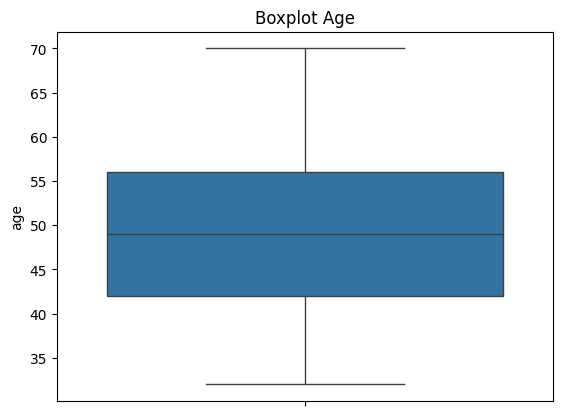

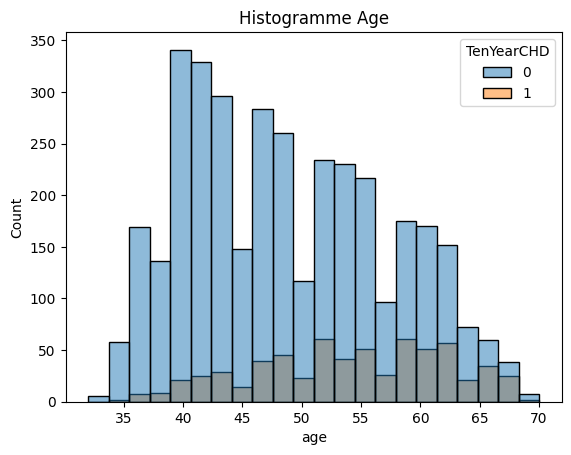

In [ ]:
# Age
sns.boxplot(y=framingham.age)
plt.title("Boxplot Age")
plt.show()

sns.histplot(x=framingham.age, hue=framingham.TenYearCHD)
plt.title("Histogramme Age")
plt.show()

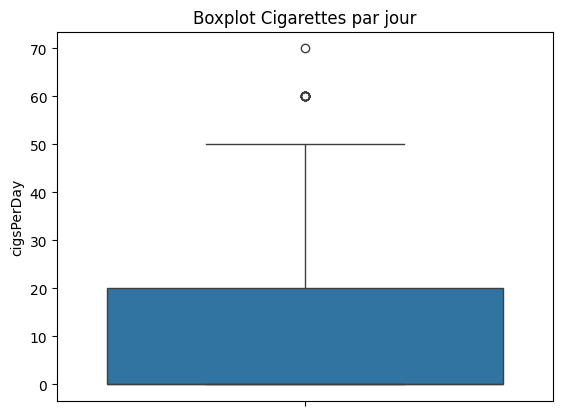

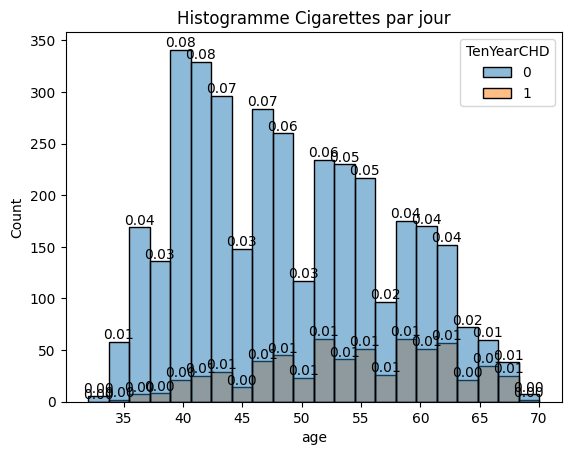

In [ ]:
# CigsPerDay
sns.boxplot(y=framingham.cigsPerDay)
plt.title("Boxplot Cigarettes par jour")
plt.show()

sns.histplot(x=framingham.cigsPerDay , hue=framingham.TenYearCHD)
plt.title("Histogramme Cigarettes par jour")
plt.show()

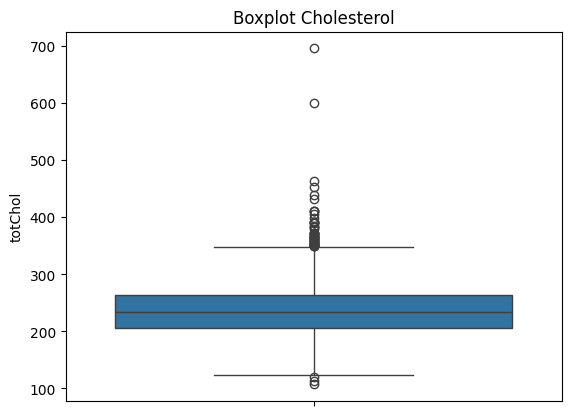

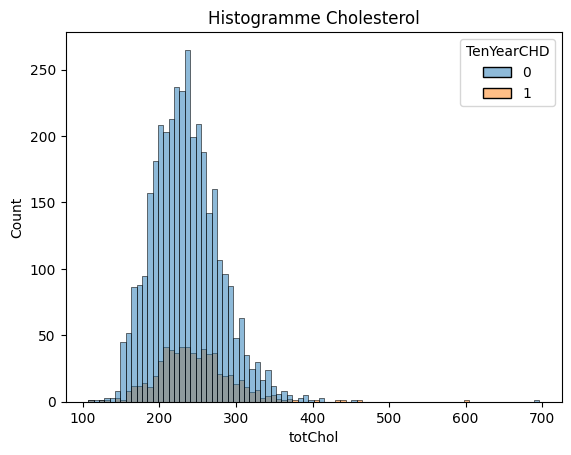

In [ ]:
# totChol
sns.boxplot(y=framingham.totChol)
plt.title("Boxplot Cholesterol")
plt.show()

sns.histplot(x=framingham.totChol, hue=framingham.TenYearCHD)
plt.title("Histogramme Cholesterol")
plt.show()

Unité :  (mg/dL)
Sous le terme de cholestérol total, on inclut les taux de cholestérol HDL et LDL, ainsi qu’un cinquième du taux de triglycérides.
Ce taux est considéré comme normal si inférieur à 2 g/l.
Selon une étude de santé publique france, en 2015, on retrouve un taux de cholestérol moyen de 2.1g/l.
On retrouve dans ce jeu de donnée une moyenne légèrement supèrieur avec une concentration de la distribution autour de cette dernière.

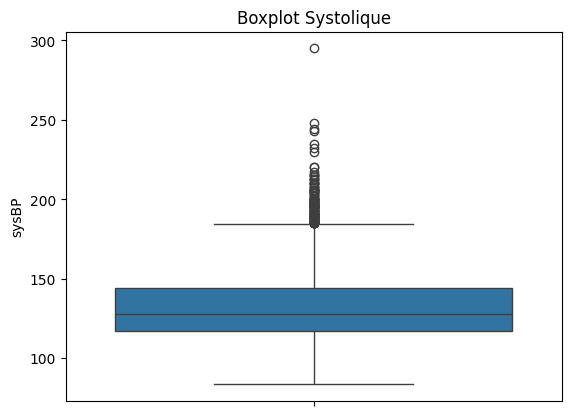

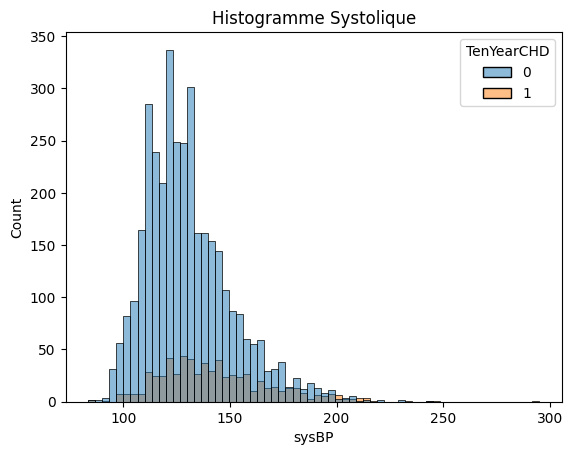

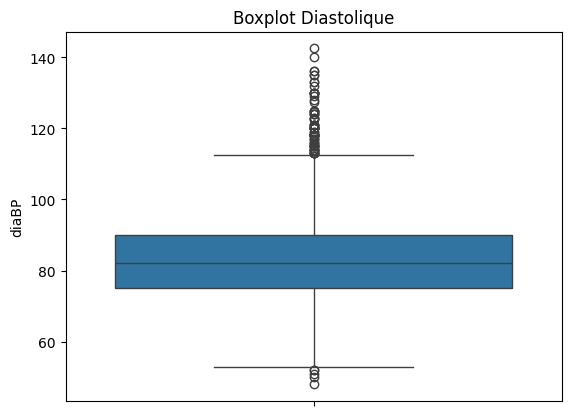

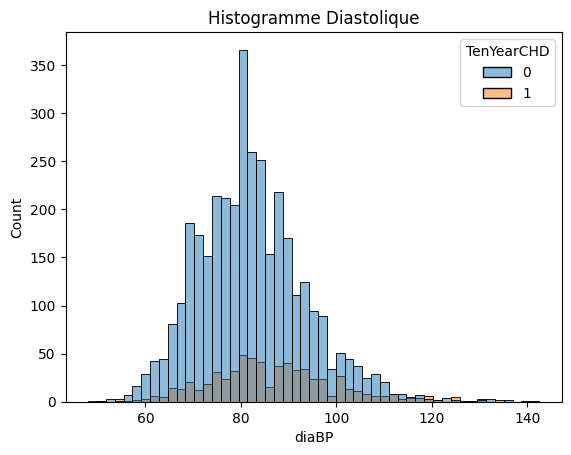

In [ ]:
# Systolique
sns.boxplot(y=framingham.sysBP)
plt.title("Boxplot Systolique")
plt.show()

sns.histplot(x=framingham.sysBP, hue=framingham.TenYearCHD)
plt.title("Histogramme Systolique")
plt.show()


# Diastolique
sns.boxplot(y=framingham.diaBP)
plt.title("Boxplot Diastolique")
plt.show()

sns.histplot(x=framingham.diaBP, hue=framingham.TenYearCHD)
plt.title("Histogramme Diastolique")
plt.show()

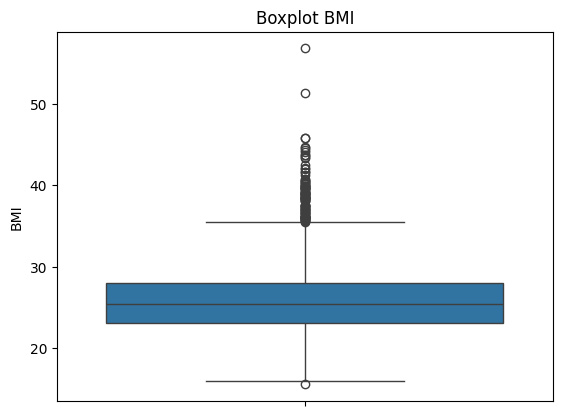

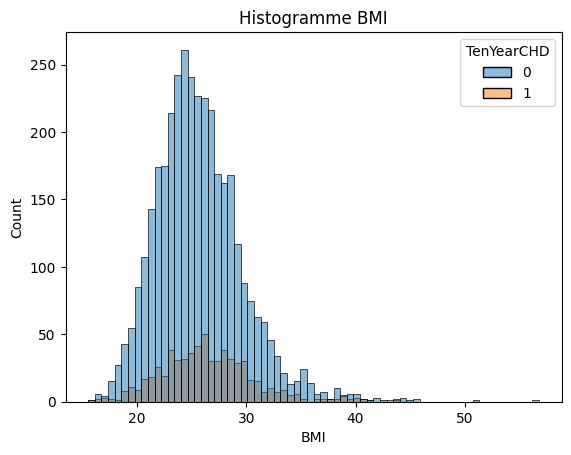

In [ ]:
# BMI
sns.boxplot(y=framingham.BMI)
plt.title("Boxplot BMI")
plt.show()

sns.histplot(x=framingham.BMI, hue=framingham.TenYearCHD)
plt.title("Histogramme BMI")
plt.show()

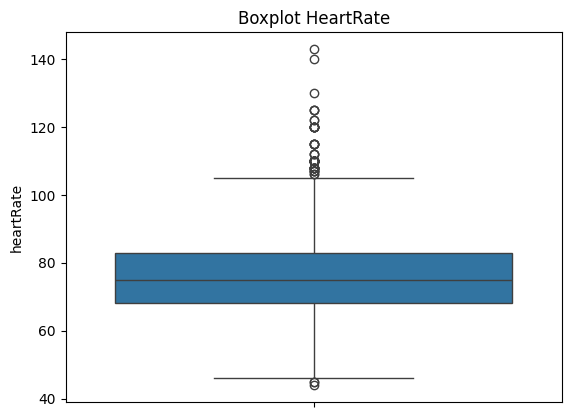

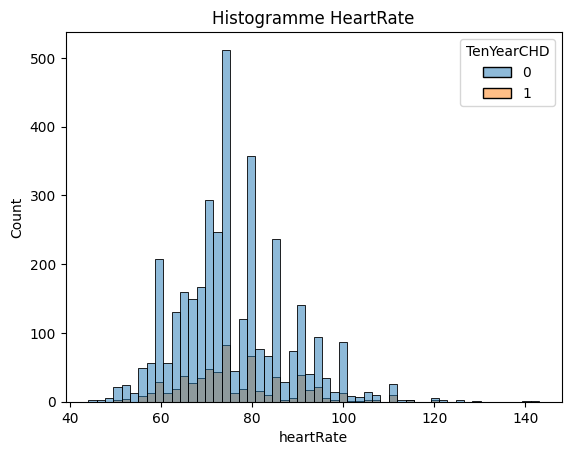

In [ ]:
# HeartRate
sns.boxplot(y=framingham.heartRate)
plt.title("Boxplot HeartRate")
plt.show()

sns.histplot(x=framingham.heartRate, hue=framingham.TenYearCHD)
plt.title("Histogramme HeartRate")
plt.show()

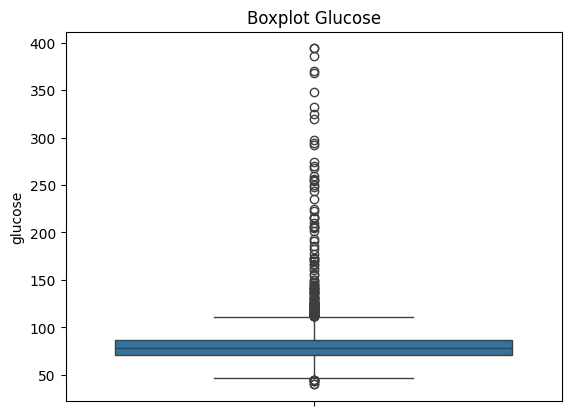

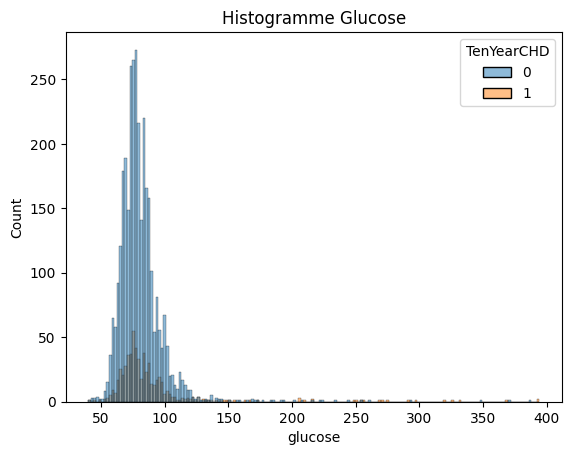

In [ ]:
# Glucose
sns.boxplot(y=framingham.glucose)
plt.title("Boxplot Glucose")
plt.show()

sns.histplot(x=framingham.glucose, hue=framingham.TenYearCHD)
plt.title("Histogramme Glucose")
plt.show()

### Predicteur Qualitatif/Binaire/Classes

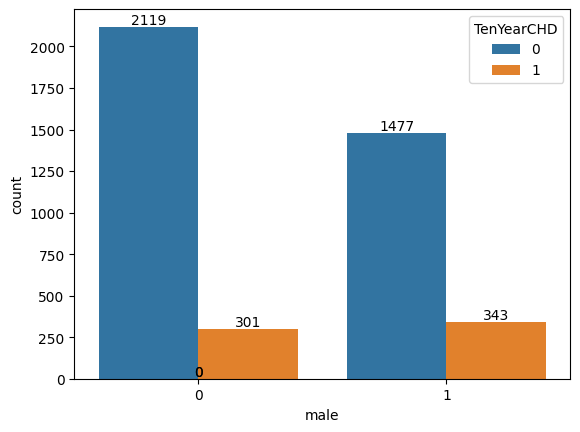

In [ ]:
# Male
ax=sns.countplot(x="male", data=framingham, hue="TenYearCHD")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.show()

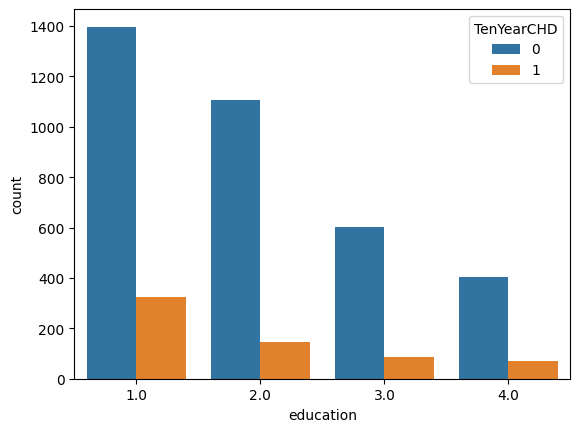

In [ ]:
# Education
sns.countplot(x="education", data=framingham, hue="TenYearCHD")
plt.show()

In [ ]:
# CurrentSmoker
ax=sns.countplot(x="cigsPerDay", data=framingham, hue="TenYearCHD")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.show()

NameError: name 'sns' is not defined

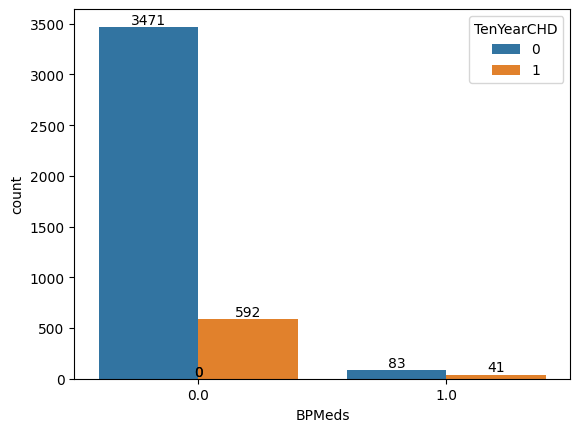

In [ ]:
# BPMeds
ax=sns.countplot(x="BPMeds", data=framingham, hue=framingham.TenYearCHD)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.show()

Sur notre jeu de donée, 3% des personnes prennent des médiacament pour reguler leur pression artérielle.

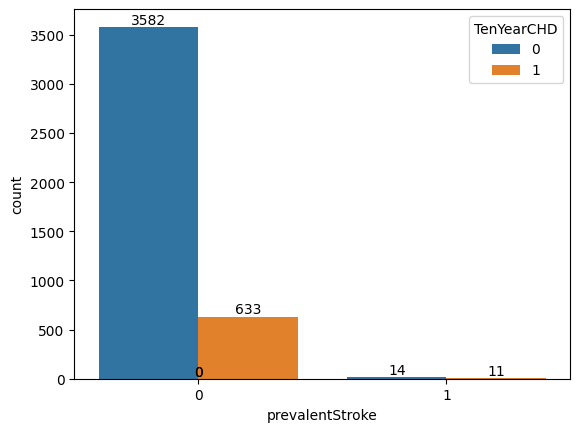

In [ ]:
# prevalentStroke
ax=sns.countplot(x="prevalentStroke", data=framingham, hue="TenYearCHD")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.show()

le taux de prévalence des AVC de notre jeu de donée est de 0.6%, il etait de 0.5% en france en 2015

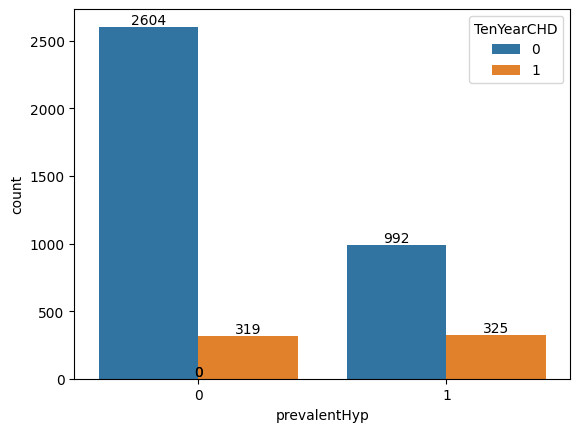

In [ ]:
# prevalentHyp
ax=sns.countplot(x="prevalentHyp", data=framingham, hue=framingham.TenYearCHD)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.show()

L’hypertension artérielle (HTA) est la pathologie chronique la plus fréquente en France, touchant près d’un adulte sur trois. Elle constitue un facteur de risque majeur de pathologies cardio-neuro-vasculaires.
Avec une valeur moyenne donnant une prevalente de 31% sur notre jeu de donnée, on se rapproche de la valeur moyenne française de 30,6%, retrouvé dans une étude de santé publique france de 2015

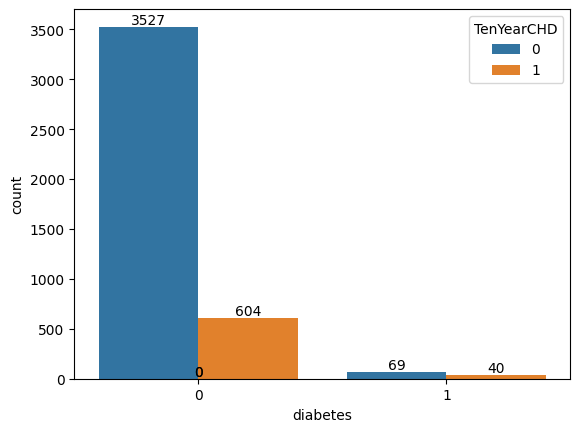

None


In [ ]:
# diabetes
ax=sns.countplot(x="diabetes", data=framingham, hue=framingham.TenYearCHD)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.show()
print(ax.figure.savefig("output.png"))


Le taux de diabete correspond au poucentage de diabétique dans une population.
Le taux de diabiète de ce jeux de donné est de 2%. Inférieur des moyenne réelles (5% france, 10% usa). L'étude datant des année 60, l'écart peut être expliqué.

## 7 - Analyse multivariée

### Corrélation

<Axes: >

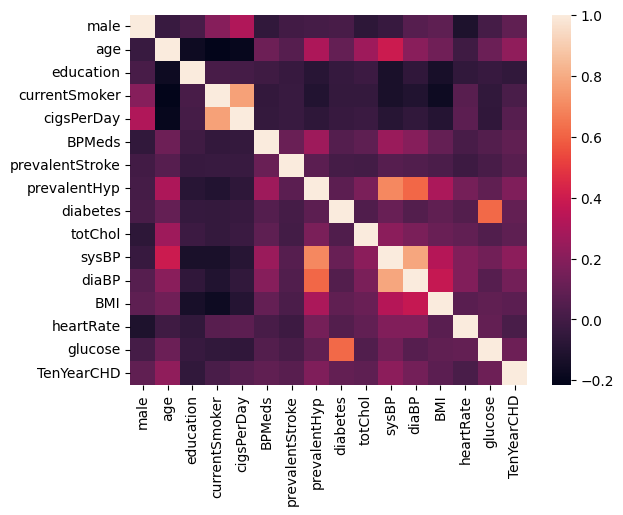

In [ ]:
corr = framingham.corr()
sns.heatmap(corr)

### Quantitatif vs quantitatif

#### Age vs ALL

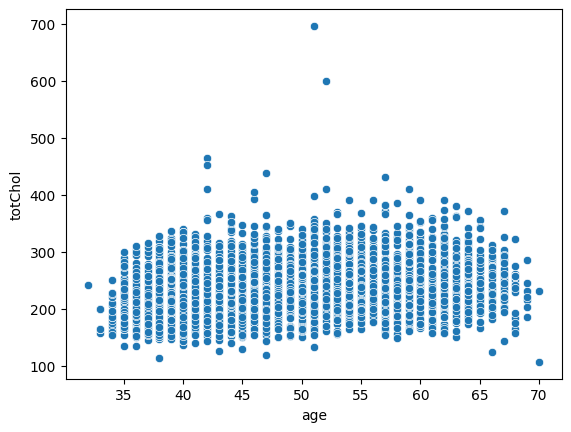

In [ ]:
sns.scatterplot(x="age", y="totChol", data=framingham)
plt.show()

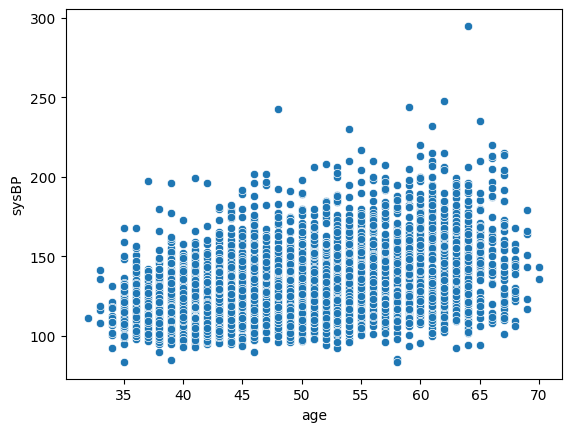

None


In [ ]:
swarm_plot = sns.scatterplot(x="age", y="sysBP", data=framingham)
plt.show()
print(swarm_plot.figure.savefig("output.png"))

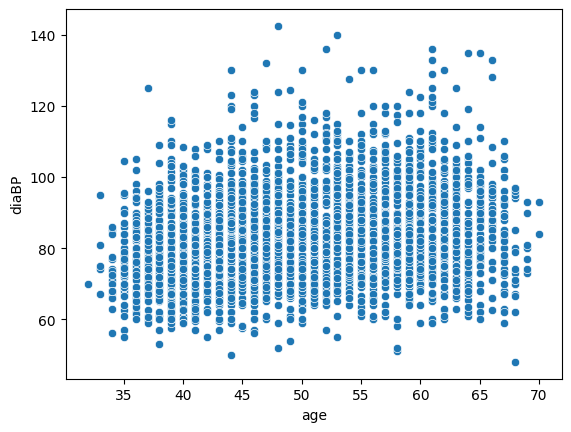

In [ ]:
sns.scatterplot(x="age", y="diaBP", data=framingham)
plt.show()

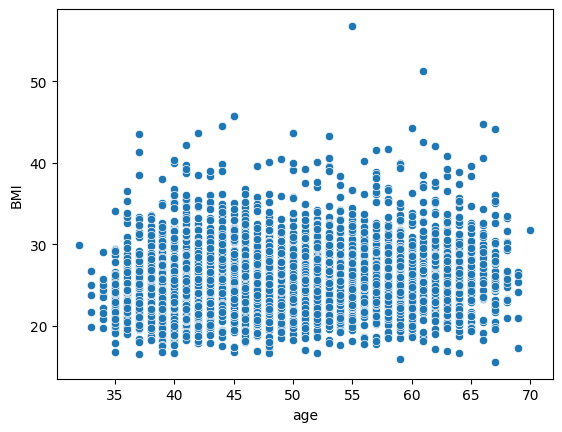

In [ ]:
sns.scatterplot(x="age", y="BMI", data=framingham)
plt.show()

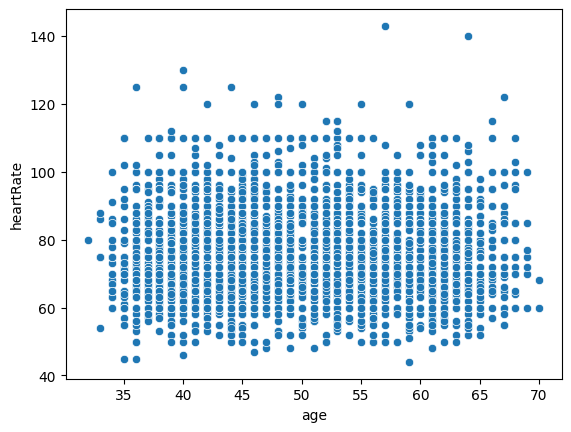

In [ ]:
sns.scatterplot(x="age", y="heartRate", data=framingham)
plt.show()

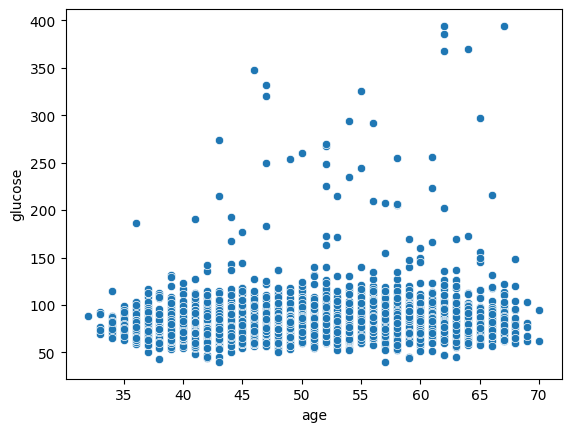

In [ ]:
sns.scatterplot(x="age", y="glucose", data=framingham)
plt.show()

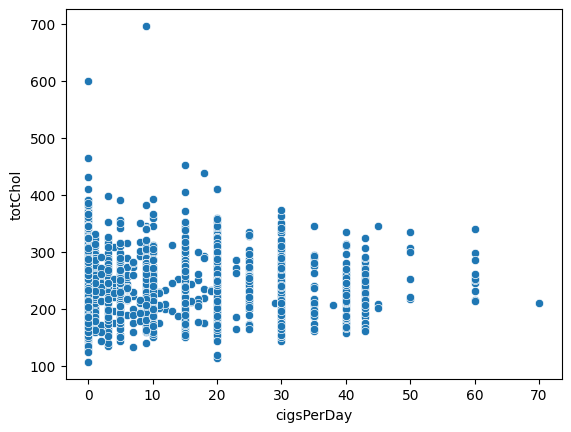

In [ ]:
sns.scatterplot(x="cigsPerDay", y="totChol", data=framingham)
plt.show()

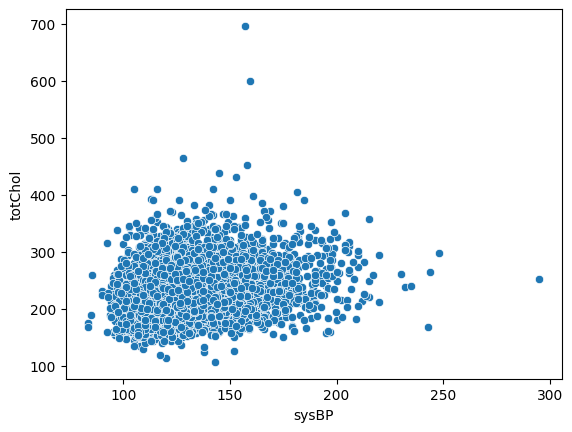

In [ ]:
sns.scatterplot(x="sysBP", y="totChol", data=framingham)
plt.show()

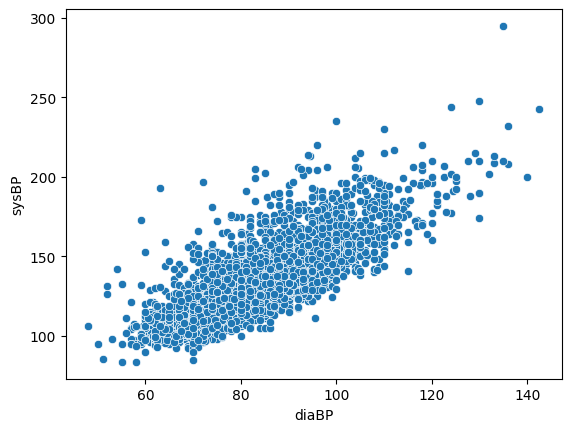

In [ ]:
sns.scatterplot(x="diaBP", y="sysBP", data=framingham)
plt.show()

### Qualitatif vs quantitatif

### Qualitatif vs qualitatif

## 8 - ACP

<Axes: >

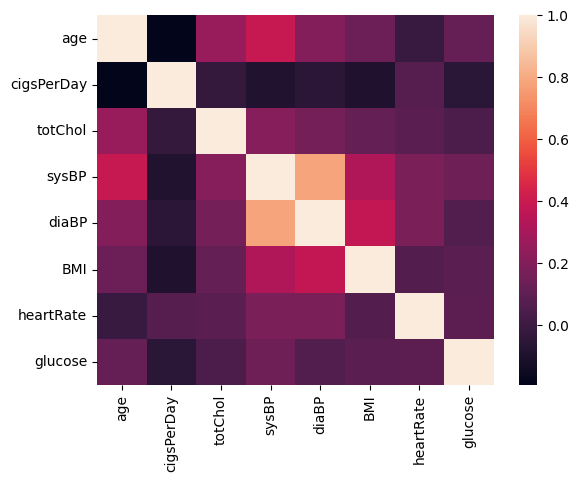

In [ ]:
framinghamQualContinue = framingham.drop(['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD'], axis=1)
corr = framinghamQualContinue.corr()
sns.heatmap(corr)

In [ ]:
cleanframinghamQualContinue = framinghamQualContinue.dropna(subset=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])

framinghamClean = framingham.dropna(subset=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'])

cls = PCA(n_components=5)
pcs_framingham = cls.fit_transform(cleanframinghamQualContinue)
cls.components_

array([[ 5.73865457e-02, -1.16532088e-02,  9.83510646e-01,
         1.48997703e-01,  6.43072545e-02,  1.32092703e-02,
         3.10642646e-02,  4.24568490e-02],
       [ 9.73091798e-02, -5.69552127e-02, -1.51290980e-01,
         6.13862770e-01,  2.69728525e-01,  4.40418670e-02,
         9.77223166e-02,  7.09455955e-01],
       [-6.42718686e-02,  1.79600313e-02,  9.11751451e-02,
        -6.26321348e-01, -3.18610013e-01, -3.52414337e-02,
        -3.98400585e-02,  7.00438218e-01],
       [-1.93627080e-01,  7.63862771e-01,  7.46582699e-04,
        -2.02874292e-02,  5.19527373e-02, -1.33018568e-02,
         6.12967420e-01,  2.23610060e-03],
       [ 8.64275963e-03, -6.19373695e-01, -1.12212838e-02,
        -1.08325374e-01, -3.90204530e-02,  8.62184358e-03,
         7.74688567e-01, -5.19799705e-02]])

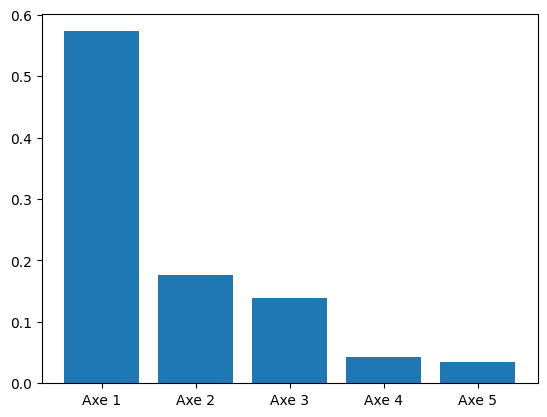

In [ ]:
test = plt.bar(["Axe 1", "Axe 2", "Axe 3", "Axe 4", "Axe 5"], cls.explained_variance_ratio_)
plt.savefig("out.png")
plt.show()

In [ ]:
print(cls.explained_variance_ratio_)

[0.57339019 0.17679394 0.13930925 0.04346824 0.03464415]


In [ ]:
print("Inertie expliquée par axe 1 : ", cls.explained_variance_ratio_[:1].sum())
print("Inertie expliquée par axe 1+2 : ", cls.explained_variance_ratio_[:2].sum())
print("Inertie expliquée par axe 1+2+3 : ", cls.explained_variance_ratio_[:3].sum())
print("Inertie expliquée par axe 1+2+3+4 : ", cls.explained_variance_ratio_[:4].sum())
print("Inertie expliquée par axe 1+2+3+4+5 : ", cls.explained_variance_ratio_[:5].sum())


Inertie expliquée par axe 1 :  0.5733901937718846
Inertie expliquée par axe 1+2 :  0.7501841291276932
Inertie expliquée par axe 1+2+3 :  0.8894933780530689
Inertie expliquée par axe 1+2+3+4 :  0.9329616138249415
Inertie expliquée par axe 1+2+3+4+5 :  0.9676057600357415


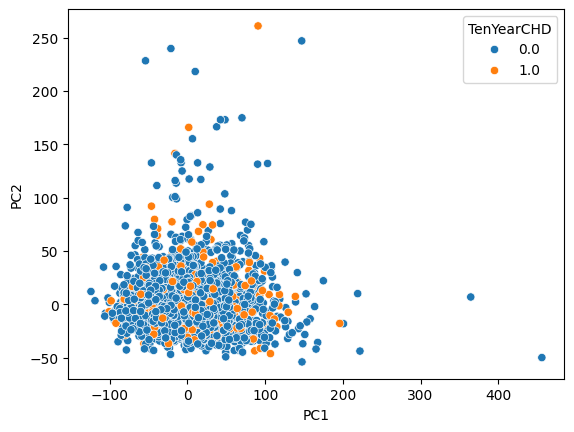

In [ ]:
df_framingham = pd.DataFrame(pcs_framingham, columns=[f"PC{i}" for i in range(1, 6)])
test = sns.scatterplot(x="PC1", y="PC2", hue=framinghamClean.TenYearCHD, data=df_framingham)
plt.show()
test.figure.savefig("acp.png")

<Axes: >

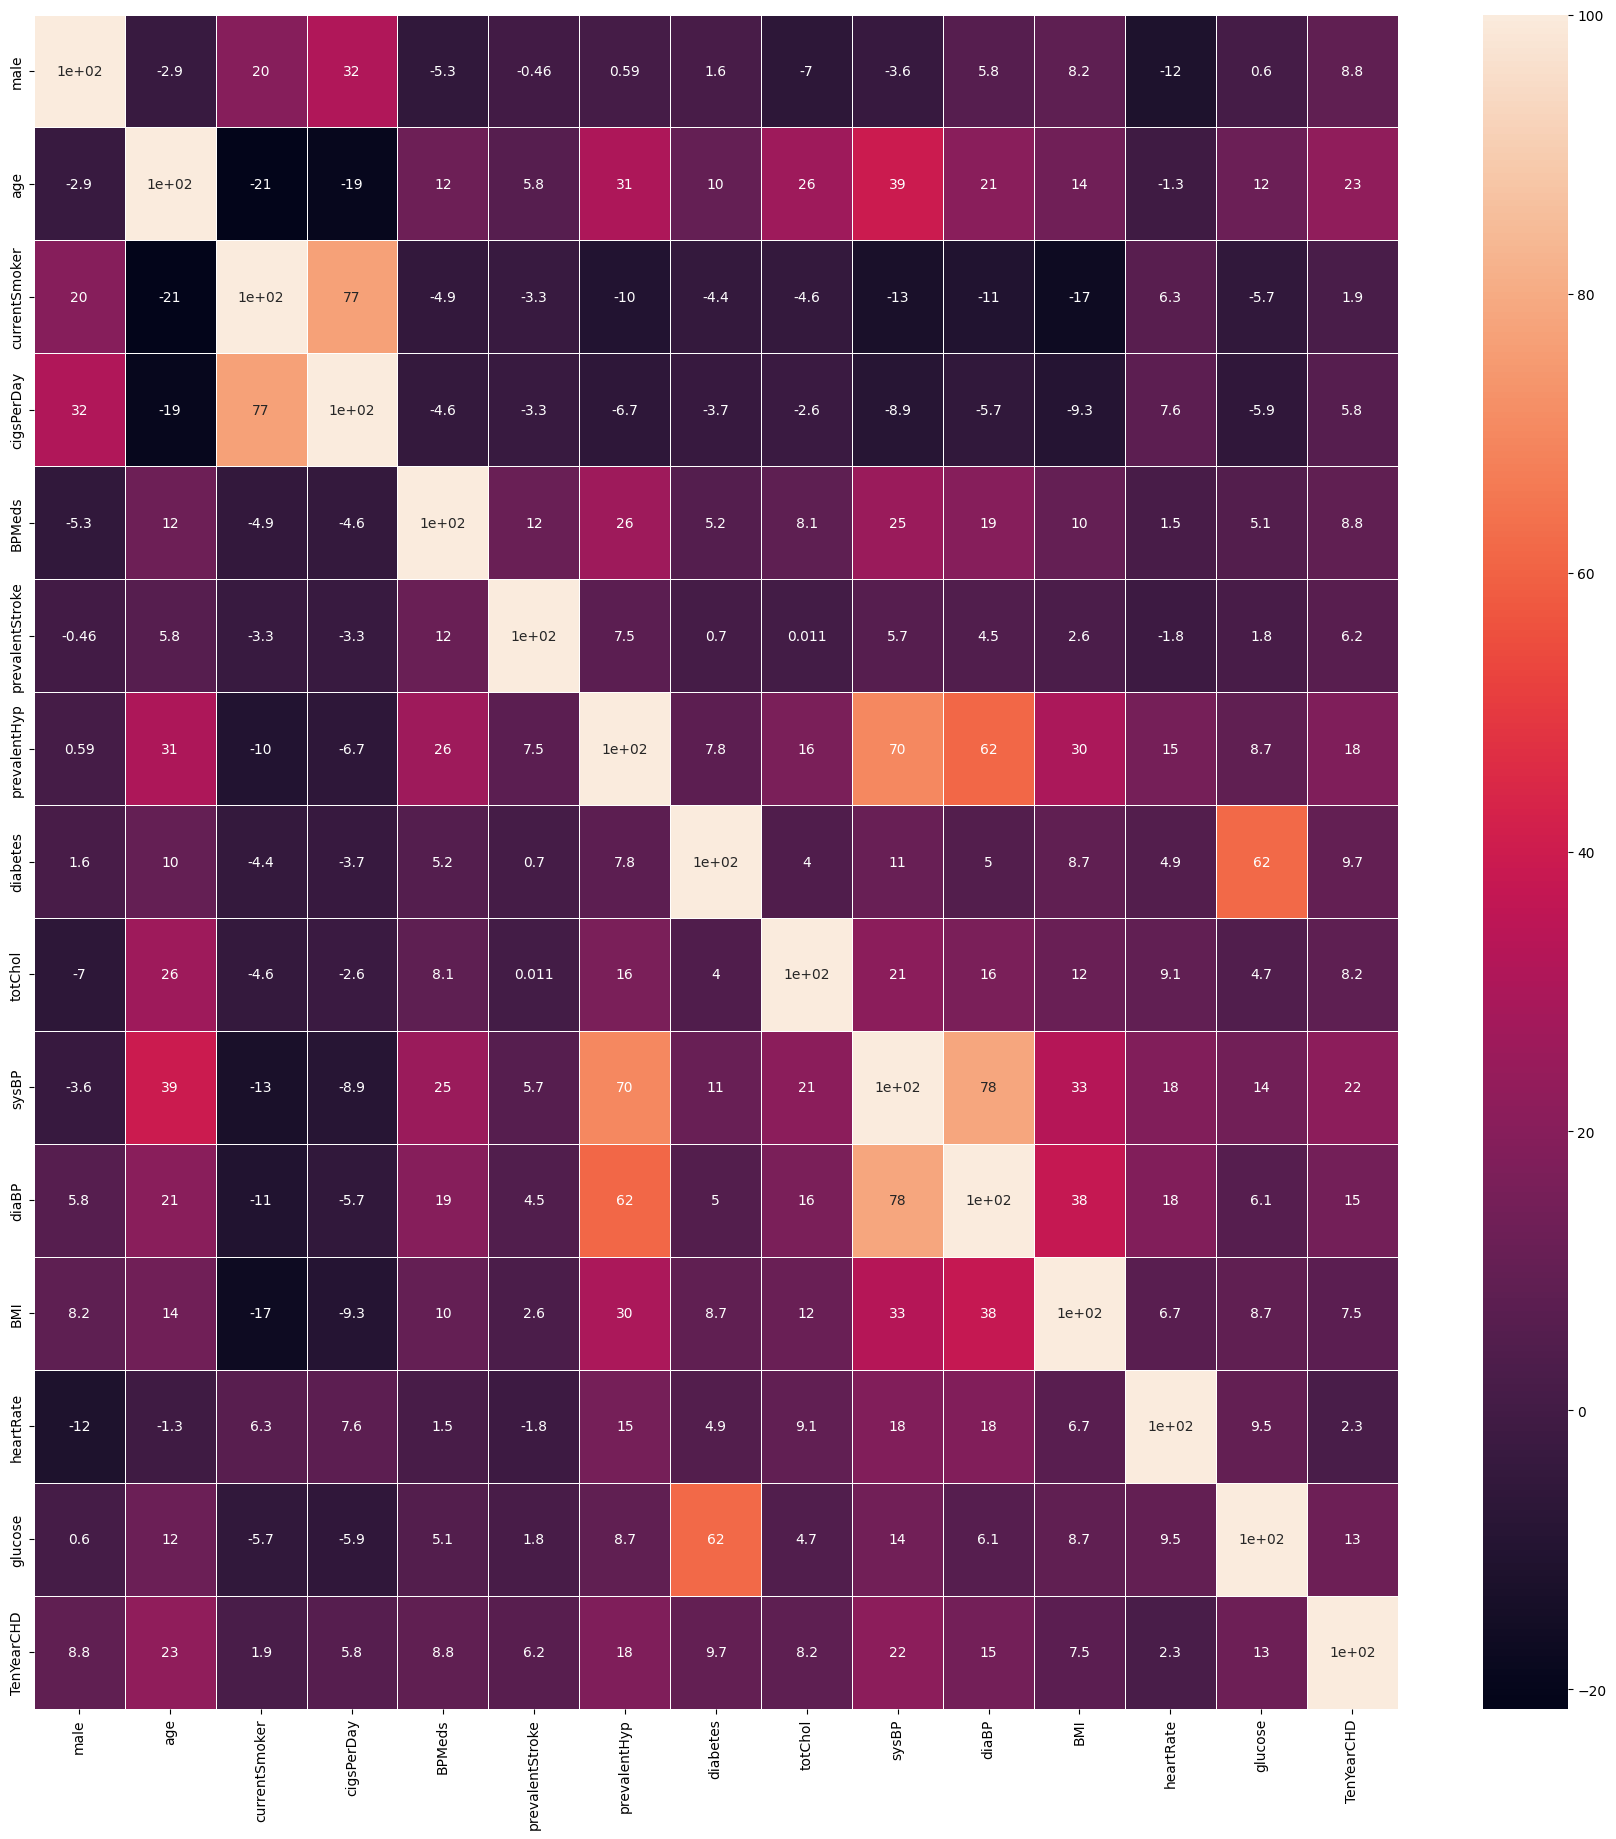

In [ ]:
framinghamWithoutEducation = framingham.drop(['education'], axis=1)

plt.figure(figsize=(22,22))
sns.heatmap(framinghamWithoutEducation.corr()*100, annot=True, linewidth=.5)

In [ ]:
framinghamWithoutEducationAndLabel = framingham.drop(['education', 'TenYearCHD'], axis=1)
framinghamWithoutEducationAndLabelClean = framinghamWithoutEducationAndLabel.dropna(subset=['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'BPMeds', 'heartRate', 'glucose'])

framinghamWithoutEducationAndLabelClean.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(framinghamWithoutEducationAndLabelClean)

labels = kmeans.labels_
print(labels)

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values